In [1]:
!top -u

top: -u requires argument


In [5]:
# !pip3 install numpy
# !pip3 install matplotlib

In [2]:
!cat alattice.txt

8,8,8,8
0     ,     0 , 0 , 0 , 0      ,     5.05604
64     ,     1 , 0 , 0 , 0      ,     -25.1395
128     ,     2 , 0 , 0 , 0      ,     4.18212
192     ,     3 , 0 , 0 , 0      ,     -1.83421
256     ,     4 , 0 , 0 , 0      ,     6.63908
320     ,     5 , 0 , 0 , 0      ,     -17.0797
384     ,     6 , 0 , 0 , 0      ,     6.01116
448     ,     7 , 0 , 0 , 0      ,     5.56682
1     ,     0 , 0 , 0 , 1      ,     -14.1472
65     ,     1 , 0 , 0 , 1      ,     23.3091
129     ,     2 , 0 , 0 , 1      ,     -4.29468
193     ,     3 , 0 , 0 , 1      ,     -20.6452
257     ,     4 , 0 , 0 , 1      ,     5.37863
321     ,     5 , 0 , 0 , 1      ,     -17.3922
385     ,     6 , 0 , 0 , 1      ,     2.57606
449     ,     7 , 0 , 0 , 1      ,     -0.707057
2     ,     0 , 0 , 0 , 2      ,     12.5909
66     ,     1 , 0 , 0 , 2      ,     21.2766
130     ,     2 , 0 , 0 , 2      ,     -17.3463
194     ,     3 , 0 , 0 , 2      ,     -17.4039
258     ,     4 , 0 , 0 , 2      ,     -11.6614
32

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:

dim=4

f=open("alattice.txt",'r')
l=f.readline()
item=l.split(",")
tStepSize,xStepSize,yStepSize,zStepSize = int(item[0]),int(item[1]),int(item[2]),int(item[3])
latticeSize=tStepSize*xStepSize*yStepSize*zStepSize 
print("rStepSize = [ {} , {} , {} ] , tStepSize = {} , latticeSize = {}".format(xStepSize,yStepSize,zStepSize,tStepSize,latticeSize))


lattice=np.ndarray((tStepSize,xStepSize,yStepSize,zStepSize))
print(" reading lattice of shape ",lattice.shape)
l=f.readline()
while l:
    item=l.split(",")
    i,j,k,l,val=int(item[1]),int(item[2]),int(item[3]),int(item[4]),float(item[5])
    lattice[i][j][k][l]=float(val)
    l=f.readline()
    
f.close()    

rStepSize = [ 8 , 8 , 8 ] , tStepSize = 8 , latticeSize = 4096
 reading lattice of shape  (8, 8, 8, 8)


In [ ]:
i,j,k=0,0,0
for i in range(tStepSize):
    for j in range(xStepSize):
        for k in range(xStepSize):
            print(lattice[:,i,j,k])

In [ ]:
sucess=True
totalFails=0
for i in range(tStepSize):
    for j in range(xStepSize):
        for k in range(xStepSize):
            for l in range(xStepSize):
                x=lattice[i][j][k][l]
                if x==lattice[i][j][k][(l+1)%xStepSize]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k,(l+1)%xStepSize))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][j][k][l-1]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k,l-1))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][j][(k+1)%xStepSize][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,(k+1)%xStepSize,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][j][k-1][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k-1,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][(j+1)%xStepSize][k][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,(j+1)%xStepSize,k,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][j-1][k][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j-1,k,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[(i+1)%xStepSize][j][k][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,(i+1)%xStepSize,j,k,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[(i+1)%xStepSize][j][k][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i-1,j,k,l))
                    sucess=False
                    totalFails+=1
                
if not sucess:
    print("validation failed to suceed with ",totalFails," mihappenings")
else:
    print("validation sucessfull")
    

In [ ]:
# sucess=True
# totalFails=0
# for i in range(tStepSize):
#     for j in range(xStepSize):
#         for k in range(xStepSize):
#             for l in range(xStepSize):
#                 x=-1*lattice[i][j][k][l]
#                 if x!=lattice[i][j][k][(l+1)%xStepSize]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k,(l+1)%xStepSize))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][j][k][l-1]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k,l-1))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][j][(k+1)%xStepSize][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,(k+1)%xStepSize,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][j][k-1][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k-1,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][(j+1)%xStepSize][k][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,(j+1)%xStepSize,k,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][j-1][k][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j-1,k,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[(i+1)%xStepSize][j][k][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,(i+1)%xStepSize,j,k,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[(i+1)%xStepSize][j][k][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i-1,j,k,l))
#                     sucess=False
#                     totalFails+=1
                
# if not sucess:
#     print("validation failed to suceed with ",totalFails," mihappenings")
# else:
#     print("validation sucessfull")
    

## Phi4 Validation

In [8]:
readNlattices=200
dim=4

f=open("lattice8bs4_1.txt",'r')
l=f.readline()
item=l.split(",")
tStepSize,xStepSize,yStepSize,zStepSize = int(item[0]),int(item[1]),int(item[2]),int(item[3])
latticeSize=tStepSize*xStepSize*yStepSize*zStepSize 
print("rStepSize = [ {} , {} , {} ] , tStepSize = {} , latticeSize = {}\n".format(xStepSize,yStepSize,zStepSize,tStepSize,latticeSize))


lattice=np.ndarray((readNlattices,tStepSize,xStepSize,yStepSize,zStepSize))
print("lattice allowted  : ",lattice.nbytes/1024/1024," MB")

print(" reading matrix of shape ",lattice.shape)
l=f.readline()
currLattice=-1
skipCount = 0
count=-1
while l:
    if l[0]=='!':
        l=f.readline()
        count+=1
        if(count%10==0):
            print(count)
        if count<skipCount:
            continue
        currLattice+=1
    if currLattice== readNlattices:
        break
    item=l.split(",")
    i,j,k,l,val=int(item[1]),int(item[2]),int(item[3]),int(item[4]),float(item[5])
    lattice[currLattice][i][j][k][l]=float(val)
    l=f.readline()
    
f.close()    


rStepSize = [ 8 , 8 , 8 ] , tStepSize = 8 , latticeSize = 4096

lattice allowted  :  6.25  MB
 reading matrix of shape  (200, 8, 8, 8, 8)
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


### Print time and spatial Slices

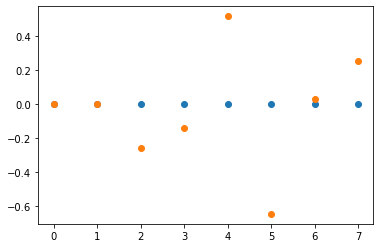

In [9]:
# time slice

stateA_Idx=0
stateB_Idx=4

tSlice_x  = 0
tSlice_y  = 0
tSlice_z  = 0

tSlice = np.arange(0,tStepSize)

plt.scatter(tSlice,lattice[stateA_Idx,:,tSlice_x,tSlice_y,tSlice_z])
plt.scatter(tSlice,lattice[stateB_Idx,:,tSlice_x,tSlice_y,tSlice_z])


(array([4.24488e+05, 2.15375e+05, 1.03762e+05, 4.61940e+04, 1.88570e+04,
        6.91500e+03, 2.56700e+03, 8.37000e+02, 1.66000e+02, 3.90000e+01]),
 array([ 0.     ,  1.57711,  3.15422,  4.73133,  6.30844,  7.88555,
         9.46266, 11.03977, 12.61688, 14.19399, 15.7711 ]),
 <BarContainer object of 10 artists>)

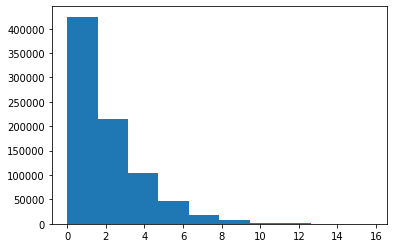

In [10]:
plt.hist(np.ndarray.flatten(abs(lattice)))

In [ ]:
lattice[stateA_Idx,Slice_t,:,:,tSlice_z]

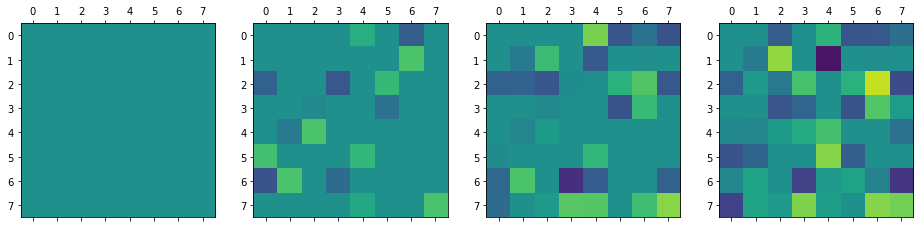

In [11]:
# time slice

stateA_Idx=0
stateB_Idx=1
stateC_Idx=2
stateD_Idx=3

Slice_t  = 0
Slice_z  = 0

tSlice = np.arange(0,tStepSize)

f,ax=plt.subplots(1,4,figsize=(16,4))
ax[0].matshow(lattice[stateA_Idx,Slice_t,:,:,tSlice_z], vmin=-1, vmax=+1)
ax[1].matshow(lattice[stateB_Idx,Slice_t,:,:,tSlice_z], vmin=-1, vmax=+1)
ax[2].matshow(lattice[stateC_Idx,Slice_t,:,:,tSlice_z], vmin=-1, vmax=+1)
ax[3].matshow(lattice[stateD_Idx,Slice_t,:,:,tSlice_z], vmin=-1, vmax=+1)

## Make images for spatial slice GIF

In [12]:
np.amax(lattice[i,Slice_t,:,:,tSlice_z])

1.5569

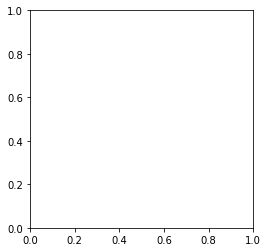

In [15]:
Slice_t  = 0
Slice_z  = 0

tSlice = np.arange(0,tStepSize)

f=plt.figure(figsize=(4,4))

ax = plt.gca()
# for i in range(200):
#     ax.matshow(np.abs(lattice[i,Slice_t,:,:,tSlice_z]), vmin=0, vmax=5.0)#np.amax(lattice[i,Slice_t,:,:,tSlice_z]))
#     plt.savefig("gifpics/"+str(i)+"_lattice.png")
    

## Observable Plots

In [17]:
!ls *.txt

alattice.txt	   lattice8bs4_6.txt	  obs_lattice8bs4_4.txt
lattice8bs4_1.txt  lattice8bs4_7.txt	  obs_lattice8bs4_5.txt
lattice8bs4_2.txt  lattice8bs4_8.txt	  obs_lattice8bs4_6.txt
lattice8bs4_3.txt  obs_lattice8bs4_1.txt  obs_lattice8bs4_7.txt
lattice8bs4_4.txt  obs_lattice8bs4_2.txt  obs_lattice8bs4_8.txt
lattice8bs4_5.txt  obs_lattice8bs4_3.txt


In [21]:
!ls obs_lattice8bs4_1.txt

obs_lattice8bs4_1.txt


In [30]:
!ls lattice14b2*

ls: cannot access 'lattice14b2*': No such file or directory


In [23]:
f=open(fname,'r')

 Reading  obs_lattice10b5_1.txt
 Reading  obs_lattice10b5_2.txt
 Reading  obs_lattice10b5_3.txt
 Reading  obs_lattice10b5_4.txt
 Reading  obs_lattice10b5_5.txt
 Reading  obs_lattice10b5_6.txt
 Reading  obs_lattice10b5_7.txt
 Reading  obs_lattice10b5_8.txt
 Reading  obs_lattice10b5_9.txt
 Reading  obs_lattice10b5_10.txt
 Reading  obs_lattice10b5_11.txt
 Reading  obs_lattice10b5_12.txt
 Reading  obs_lattice10b5_13.txt
 Reading  obs_lattice10b5_14.txt
 Reading  obs_lattice10b5_15.txt
 Reading  obs_lattice10b5_16.txt
 Reading  obs_lattice10b5_17.txt
 Reading  obs_lattice10b5_18.txt
 Reading  obs_lattice10b5_19.txt
 Reading  obs_lattice10b5_20.txt
 Reading  obs_lattice10b5_21.txt
 Reading  obs_lattice10b5_22.txt
 Reading  obs_lattice10b5_23.txt
 Reading  obs_lattice10b5_24.txt
 Reading  obs_lattice10b5_25.txt
 Reading  obs_lattice10b5_26.txt
 Reading  obs_lattice10b5_27.txt
 Reading  obs_lattice10b5_28.txt
 Reading  obs_lattice10b5_29.txt
 Reading  obs_lattice10b5_30.txt
 Reading  obs_latti

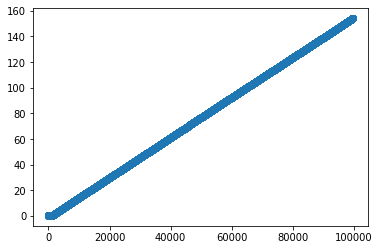

In [37]:
name='lattice4b2'
name='lattice8b4'
name='lattice14b2'
name='lattice10b5'
idxs=[i+1 for i in range(389)]

step=[]
energy=[]

for idx in idxs:
    fname='obs_'+name+'_'+str(idx)+'.txt'
    print(" Reading ",fname)
    f=open(fname,'r')
    l=f.readline()
    item=l[:-1].split(",")
    tStepSize,xStepSize,yStepSize,zStepSize = int(item[0]),int(item[1]),int(item[2]),int(item[3])
    latticeSize=tStepSize*xStepSize*yStepSize*zStepSize 
    l=f.readline()
    numObsevables=int(l[:-1])
    l=f.readline()
    while(l):
        item=l[:-1].split(",")
#         print(l,item)
        pos=int(item[0])
        energy.append(abs(float(item[1])))
        
        l=f.readline()
energy=np.array(energy)   
plt.scatter(np.arange(0,energy.shape[0]),energy)

In [23]:
energy.shape[0]

97024

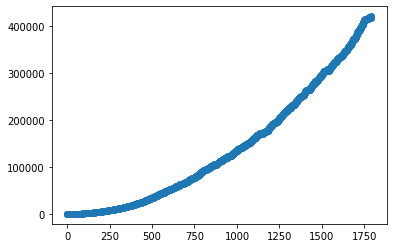